# 카테고리 분포

카테고리 분포(Categorical distribution)는 베르누이 분포의 확장판이다. 

베르누이 분포는 0 이나 1(또는 -1 이나 1)이 나오는 확률 변수의 분포였다. 즉 동전을 던져 나오는 결과를 묘사할 때 쓸 수 있다. 그런데 동전이 아닌 주사위를 던져서 나오는 경우는 어떻게 묘사할 수 있을까? 이 때 사용하는 것이 카테고리 분포이다.

카테고리 분포는 1부터 K까지의 $K$개의 정수 값 중 하나가 나오는 확률 변수의 분포이다. 따라서 주사위를 던져 나오는 눈금의 수를 확률 변수라고 한다면 이 확률 변수는 $\{1, 2, 3, 4, 5, 6\}$ 값이 나오는 즉, 클래스의 수 $K=6$인 카테고리 분포이다.

그런데 주의할 점은 카테고리 분포는 카테고리인 스칼라 값을 출력하는 확률 변수지만 보통 다음과 같이 1과 0으로만 이루어진 다차원 벡터 형태로 인코딩한 값을 출력하는 벡터 확률 변수로 사용한다. 

$$ 
\begin{eqnarray}
x = 1  \;\; & \rightarrow & \;\; x = (1, 0, 0, 0, 0, 0) \\
x = 2  \;\; & \rightarrow & \;\; x = (0, 1, 0, 0, 0, 0) \\
x = 3  \;\; & \rightarrow & \;\; x = (0, 0, 1, 0, 0, 0) \\
x = 4  \;\; & \rightarrow & \;\; x = (0, 0, 0, 1, 0, 0) \\
x = 5  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 1, 0) \\
x = 6  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 0, 1) \\
\end{eqnarray}
$$

이러한 인코딩 방식을 One-Hot-Encoding 이라고 한다.

즉, 출력되는 확률 변수의 값 $x$ 가 다음과 같이 벡터 값이 되는 것이다.

$$ x = (x_1, x_2, x_3, x_4, x_5, x_6)  $$

단, 이 벡터를 구성하는 원소 $x_1$, $x_2$, $x_3$, $x_4$, $x_5$, $x_6$ 에는 다음과 같은 제한 조건이 붙는다. 

$$ x_i = \begin{cases} 0 \\ 1 \end{cases} $$

$$ \sum_{k=1}^K x_k = 1 $$

첫번째 제한 조건은 $x_k$의 값이 0 또는 1 만 가능하다는 것이고 두번째 제한 조건은 여러개의 $x_k$ 중 단 하나만 1일 수 있다는 것이다.

이 각각의 원소 값 $x_k$는 일종의 베르누이 확률 분포로 볼 수 있기 때문에 각각 1이 나올 확률을 나타내는 모수 $\theta_k$를 가진다. 그리고 전체 카테고리 분포의 모수는 다음과 같이 벡터로 나타낸다.

$$ \theta = ( \theta_1, \cdots , \theta_K ) $$

이 모수 벡터도 다음과 같이 제한 조건을 가진다.

$$ 0 \leq \theta_i \leq 1 $$

$$ \sum_{k=1}^K \theta_k = 1 $$

첫번째 제한 조건은 모수 $\theta_k$가 0과 1사이의 값만 가질 수 있다는 점을 가리킨다. 각각의 원소 값 $x_k$는 일종의 베르누이 확률 분포로 볼 수 있기 때문에 당연하다. 두번째 제한 조건은 $\theta_k$의 합이 1이 된다는 것이다. 나올 수 있는 경우의 확률의 합은 1이 되어야 하므로 이 또한 당연하다. 다만 0 아니면 1만 되어야 하는 $x_k$ 와는 달리 $\theta_k$ 는 0부터 1사이의 어떤 실수 값이든 가질 수 있다. 

카테고리 분포는 

$$\text{Cat}(x_1, x_2, \dots, x_K;\theta_1, \dots, \theta_K)$$

로 표기하거나 출력 벡터 $x=(x_1, x_2, \dots, x_K)$, 모수 벡터 $\theta=(\theta_1, \dots, \theta_K)$를 사용하여 

$$ \text{Cat}(x;\theta) $$

로 간단히 표기할 수 있다.

함수의 값은 다음처럼 표기한다.

$$ 
\text{Cat}(x;\theta) = 
\begin{cases}
\theta_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\theta_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\theta_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\theta_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
$$

위 식은 다음과 같이 간략하게 쓸 수 있다. 이 간략한 표현은 One-Hot-Encoding을 사용한 덕분이다.

$$ \text{Cat}(x;\theta) = \theta_1^{x_1} \theta_2^{x_2}  \cdots \theta_K^{x_K}  =  \prod_{k=1}^K \theta_k^{x_k} $$

이 식에서 확률값은  $x = k $일때 $x_{j=k} = 1$ 이고 $x_{j\neq k} = 0 $ 이다.

## 모멘트

카테고리 분포의 기댓값과 분산은 다음과 같다.

* 기댓값
$$\text{E}[x_k] = \theta_k$$

* 분산
$$\text{Var}[x_k] = \theta_k(1-\theta_k)$$

## 시뮬레이션

SciPy는 카테고리 분포를 위한 별도의 클래스나 명령어를 제공하지 않는다. 다만 NumPy의 random 서브패키지의 `multinomial` 명령에서 `n` 인수를 1로 설정하고 `pvals`에 모수 벡터 $\theta$를 설정하면 1부터 `len(pvals)`까지의 카테고리 분포를 따르는 데이터 샘플을 생성할 수 있다.

In [1]:
np.random.seed(0)
theta = np.array([1/6]*6)
X = np.random.multinomial(1, theta, size=20)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

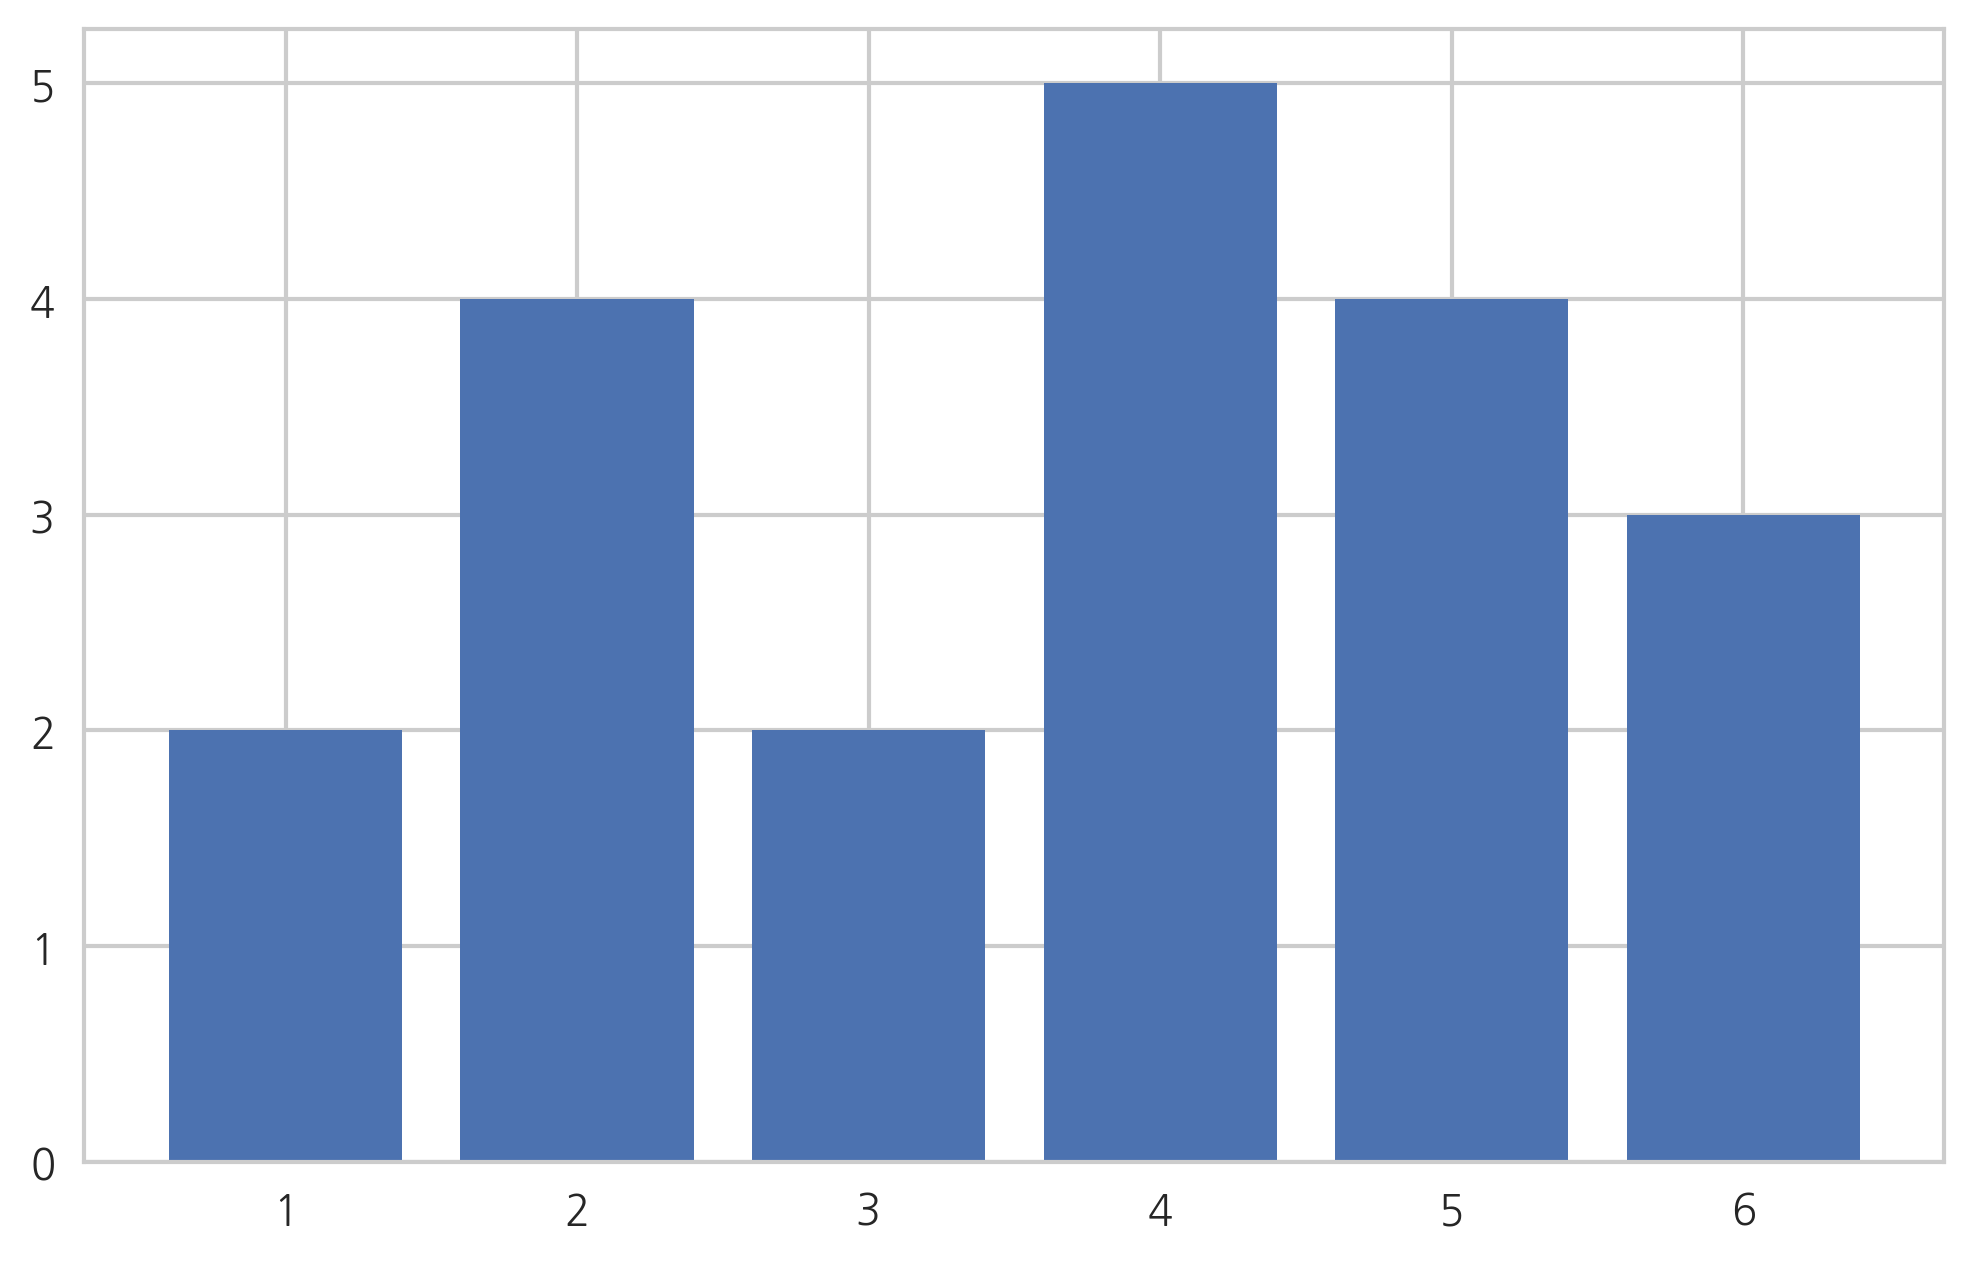

In [2]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [3]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.100000
1,0,theoretic,0.166667
2,1,simulation,0.200000
3,1,theoretic,0.166667
4,2,simulation,0.100000


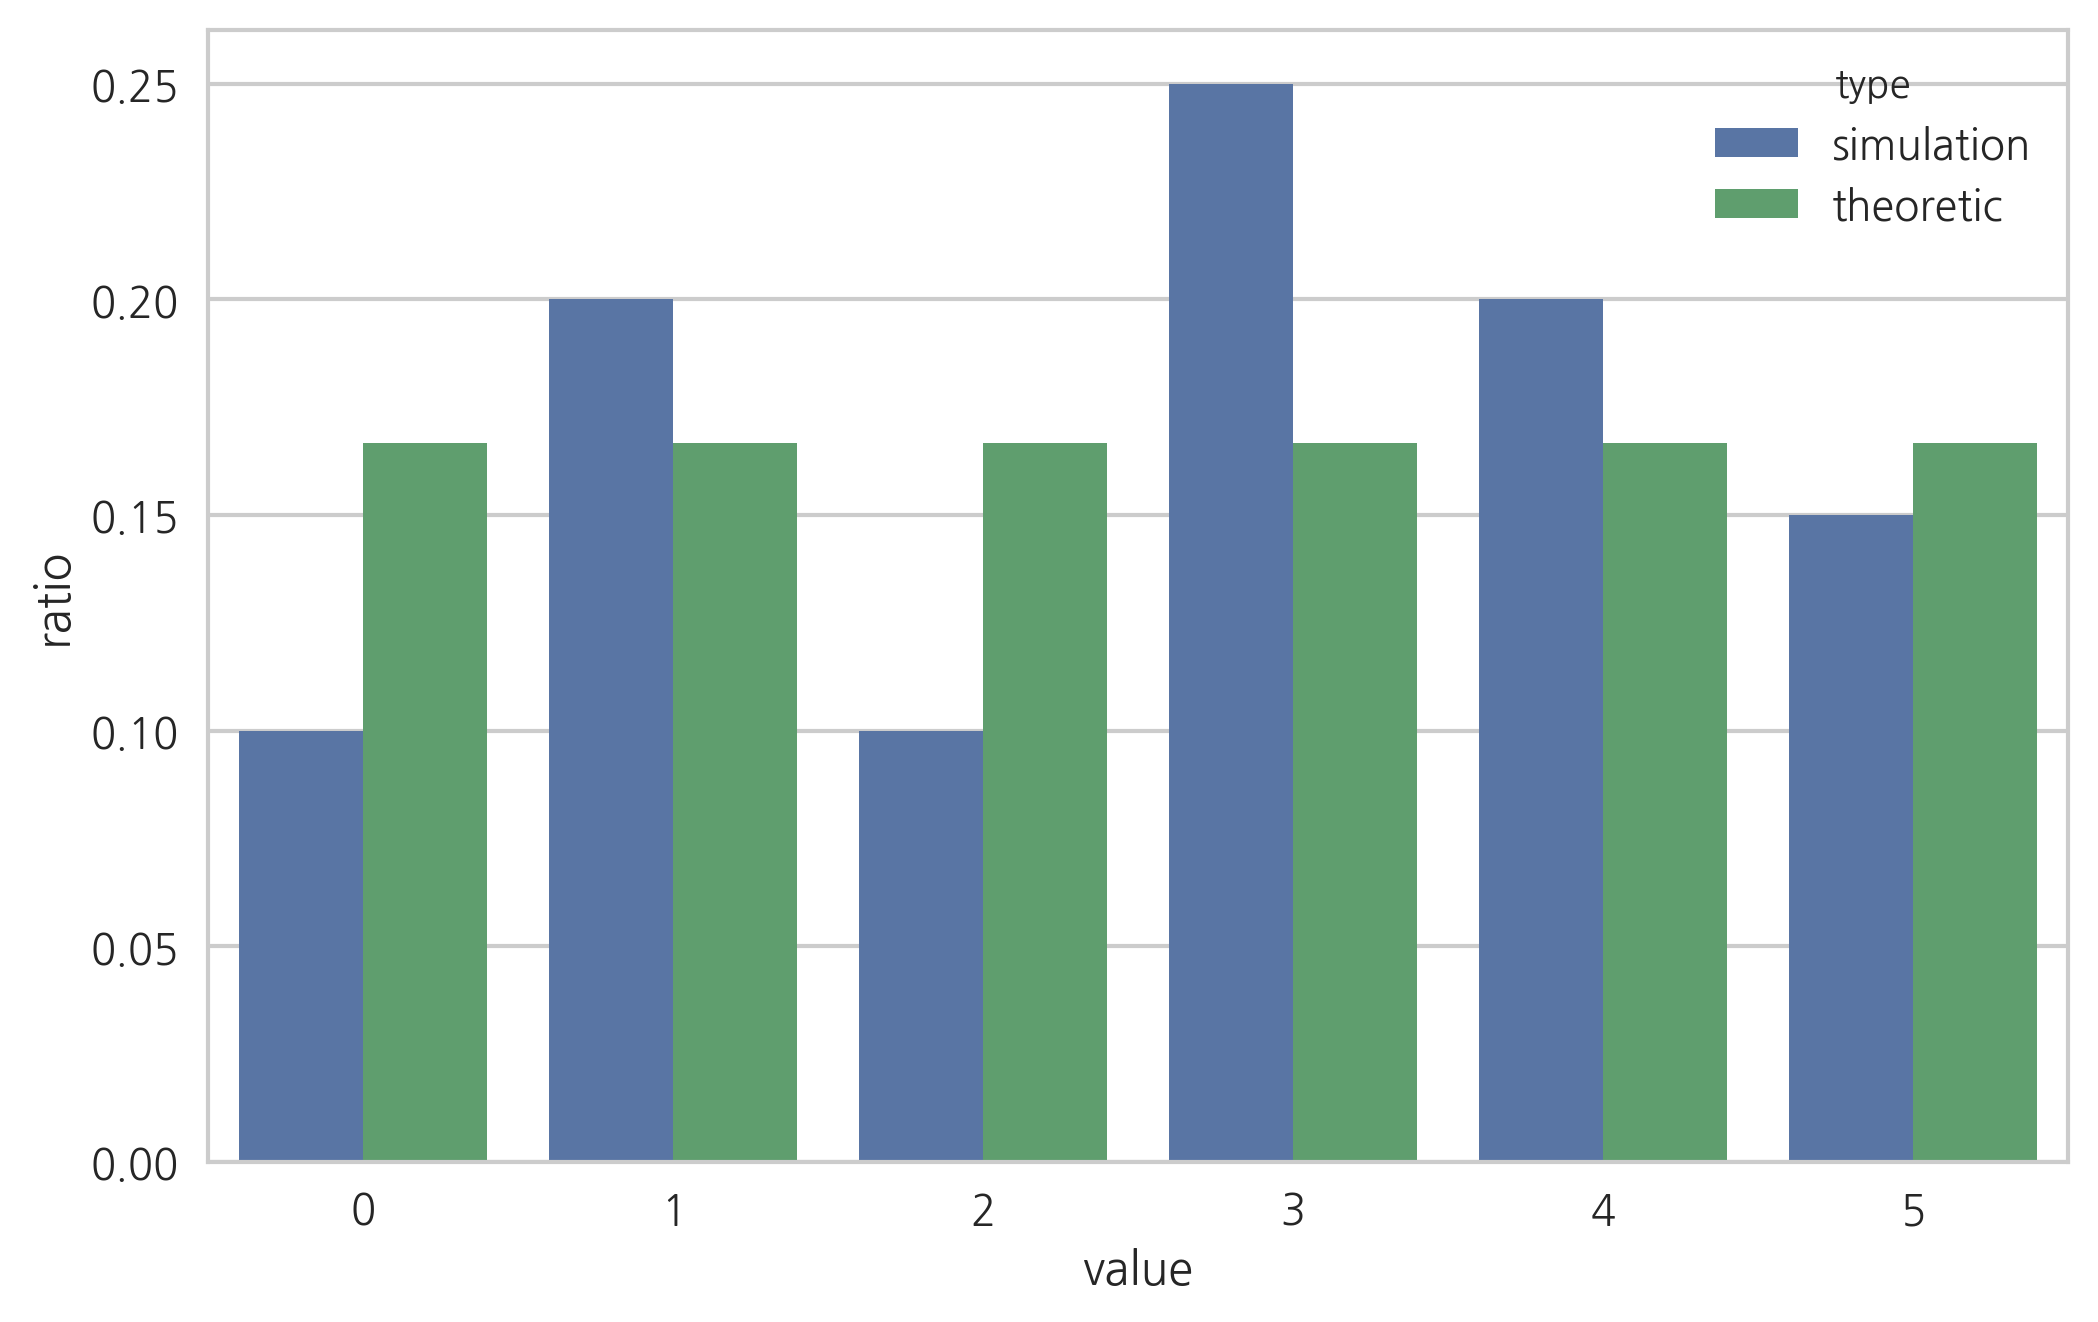

In [4]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

$\theta$를 다른 값으로 실행해보자

In [5]:
np.random.seed(0)
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(1, theta, size=20)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0]])

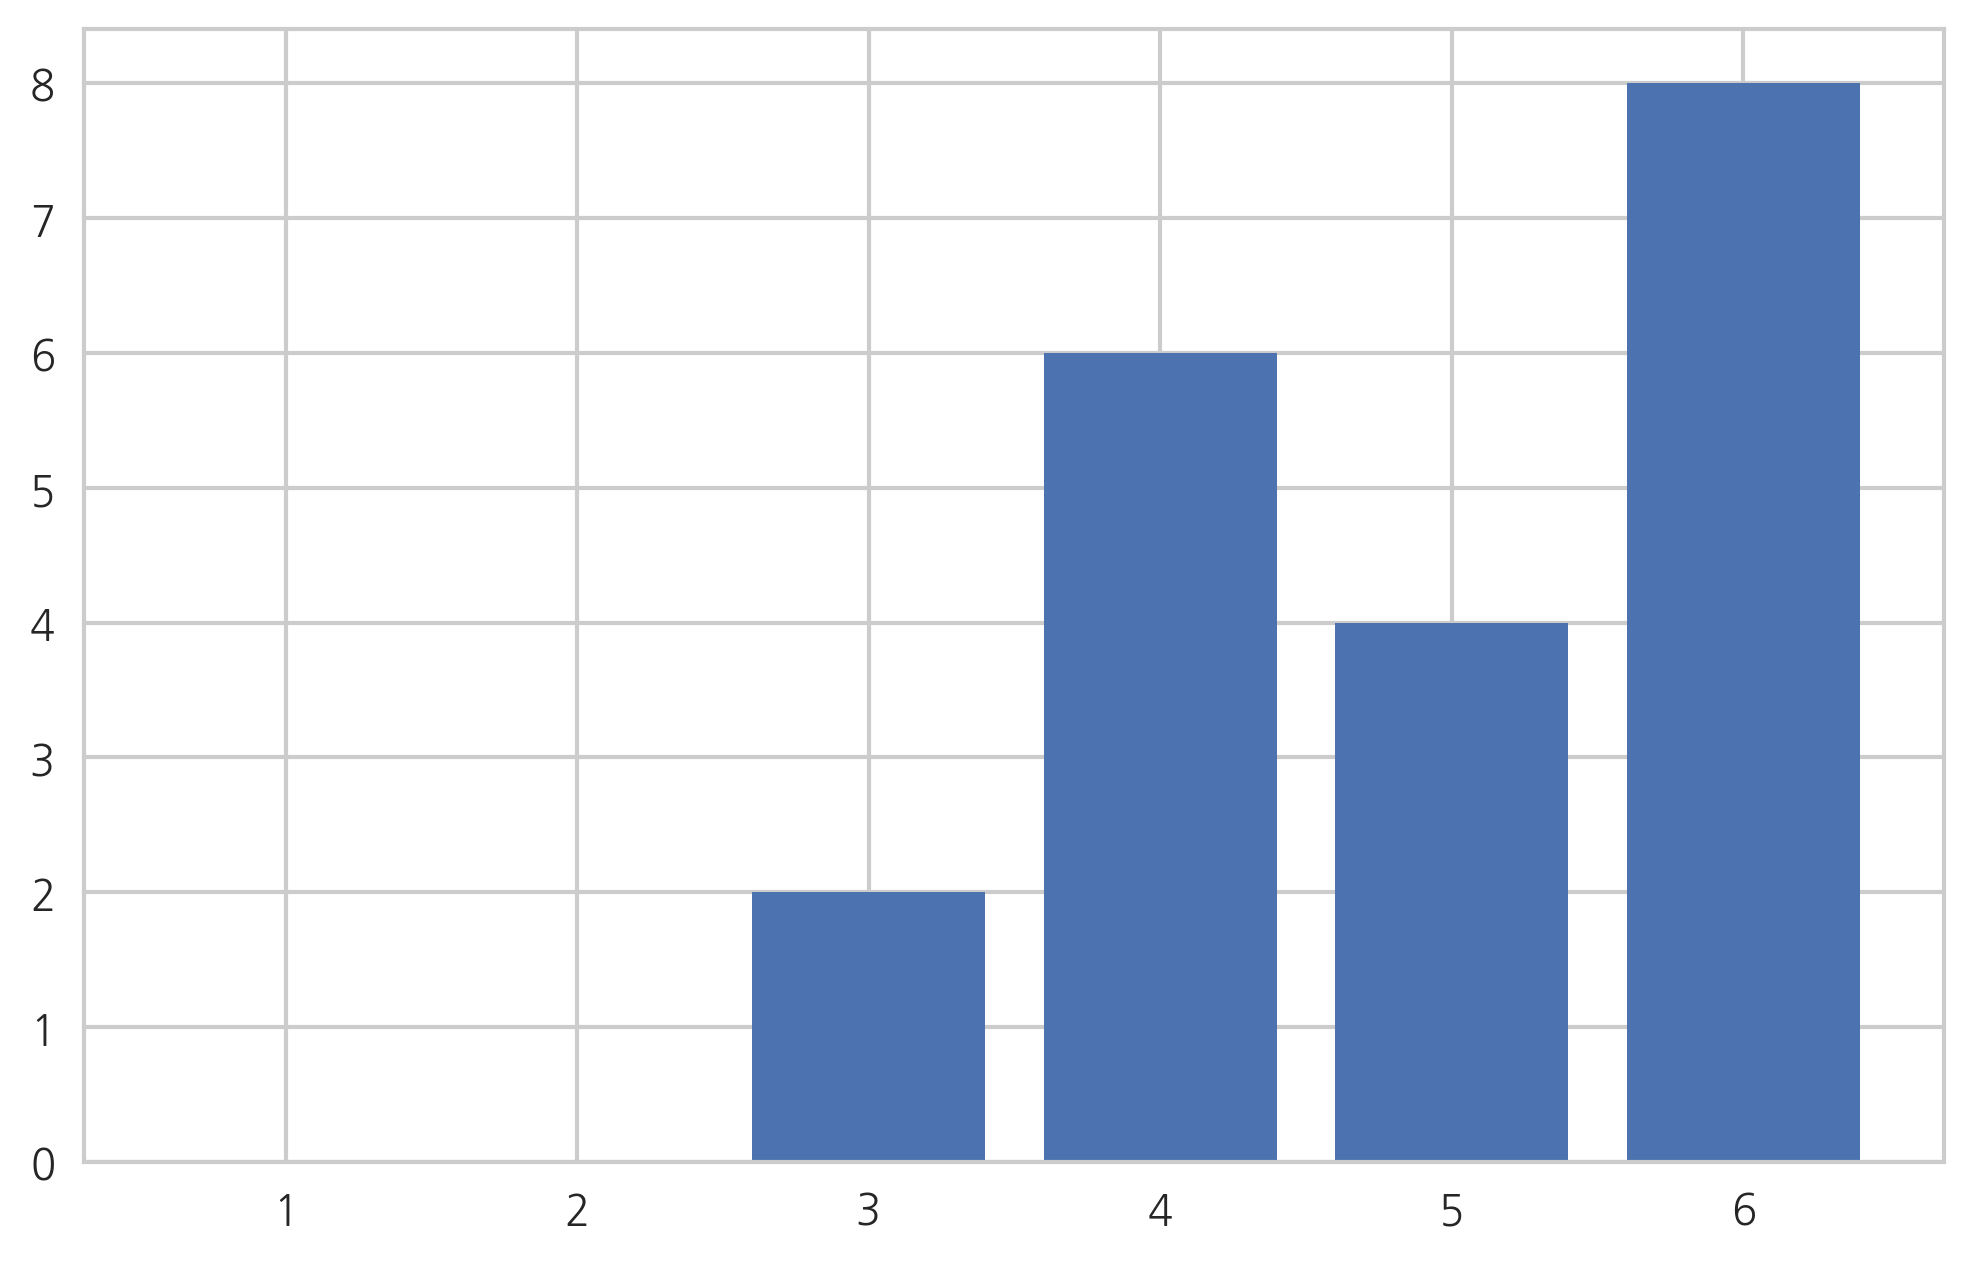

In [6]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [7]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.0
1,0,theoretic,0.0
2,1,simulation,0.0
3,1,theoretic,0.0
4,2,simulation,0.1


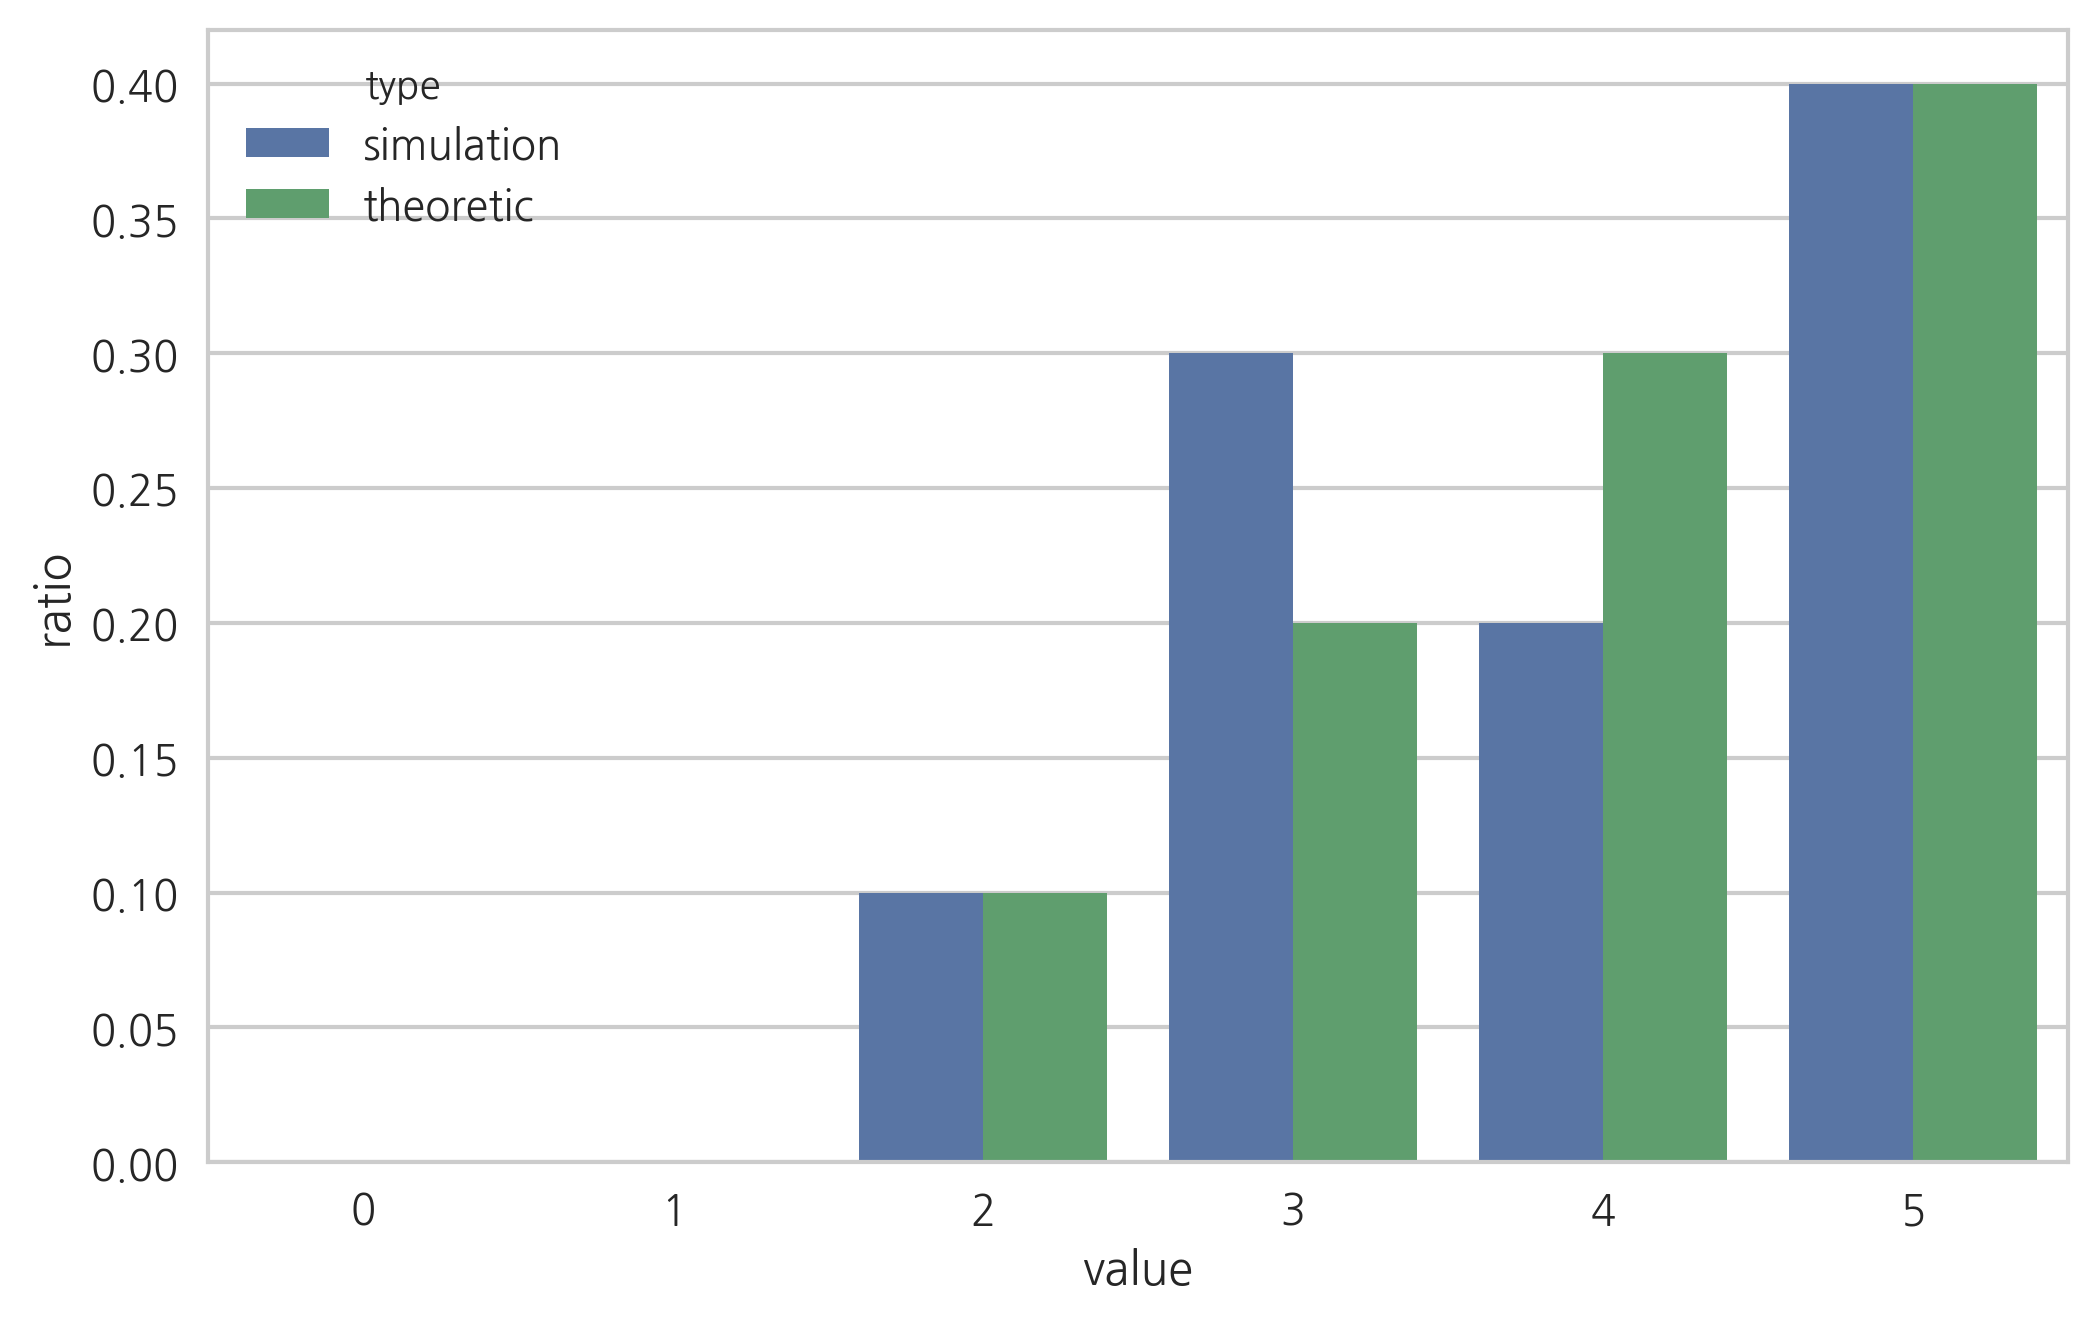

In [8]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()